# Figure 3: Dynamics of total population size during mutational meltdown

Generate **figures/N.pdf**.

In [1]:
from doomed import *

/Users/rbazev/Documents/GitHub/doomed/python/doomed.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath', r'\usepackage{helvet}']


u = 0.02 / s = 0.07
Max extinction time = 368


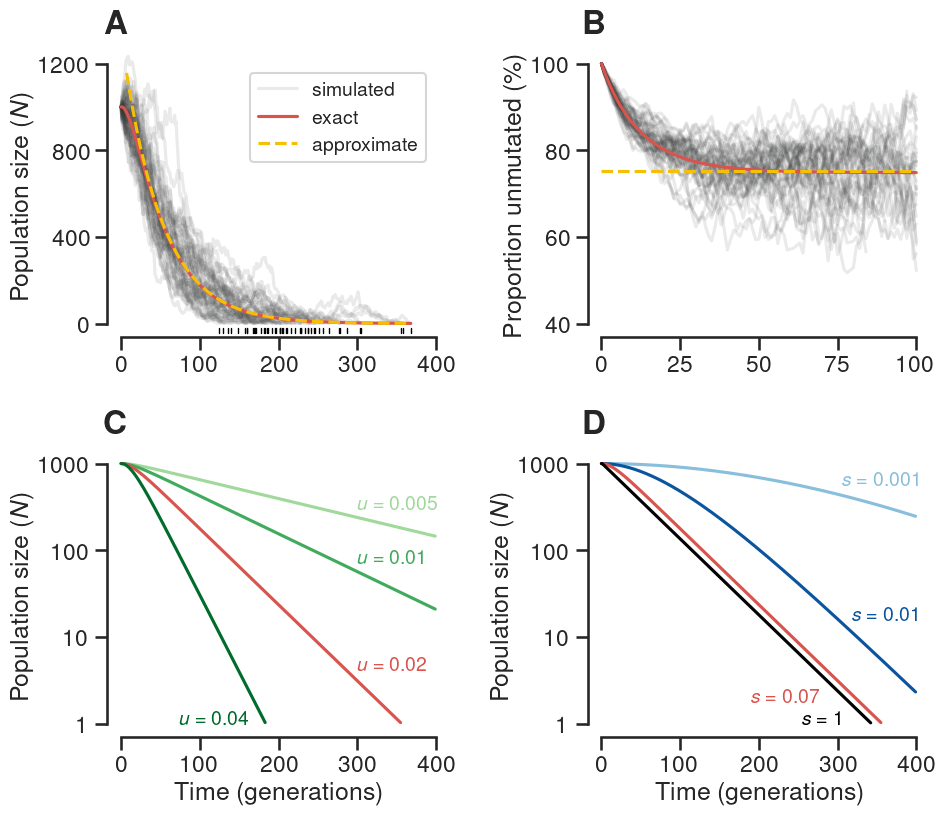

In [31]:
np.random.seed(6232023)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9.4, 8))

fig.subplots_adjust()

set_up_axes(ax1, xmin=0, xmax=400, xstep=100, ymin=0, ymax=1200, ystep=400, rnd=0, 
    ylabel=r'Population size $(N)$', xlabel='', part_label=r'\textbf{A}')
set_up_axes(ax2, xmin=0, xmax=100, xstep=25, ymin=40, ymax=100, ystep=20, rnd=0, 
    ylabel=r'Proportion unmutated (\%)', xlabel='', part_label=r'\textbf{B}')
set_up_axes(ax3, xmin=0, xmax=400, xstep=100, ymin=0, ymax=3, ystep=1, rnd=0, 
    ylabel='Population size $(N)$', xlabel='Time (generations)', part_label=r'\textbf{C}')
set_up_axes(ax4, xmin=0, xmax=400, xstep=100, ymin=0, ymax=3, ystep=1, rnd=0, 
    ylabel='Population size $(N)$', xlabel='Time (generations)', part_label=r'\textbf{D}')

ax1.set_position([.125, .605, .335, .325])
ax2.set_position([.636, .605, .335, .325])
ax3.set_position([.125, .105, .335, .325])
ax4.set_position([.636, .105, .335, .325])

# Parts A and B: stochastic simulations
Z0 = List([1000])
u = 0.02
s = 0.07
tt = []
for i in range(50):
    tmpN, tmpZ, t = to_extinction(Z0, s, u)
    tt.append(t)
    if i==0:
        ax1.plot(tmpN, color=gre, alpha=.1, clip_on=False, label='simulated')
    else:
        ax1.plot(tmpN, color=gre, alpha=.1, clip_on=False)
    ax1.plot([t] * 2, [-20, -45], 'k-', clip_on=False, lw=1)
    if t > 200:
        r = [100 * tmpZ[j][0] / tmpN[j] for j in range(101)]
    else:
        r = [100 * tmpZ[j][0] / tmpN[j] for j in range(int(t/2))]
    ax2.plot(r, color=gre, alpha=.1, clip_on=False)

# Theory
theoryN = [ENt(Z0, t, s, u) for t in range(500)]
theoryr = [100 * Eztk(Z0, t, 0, s, u) / ENt(Z0, t, s, u) for t in range(101)]
ax1.plot(theoryN[:(max(tt)+1)], color=red, clip_on=False, label='exact')
ax2.plot(theoryr, color=red, clip_on=False)
print('u = {0} / s = {1}'.format(u, s))
print('Max extinction time =', max(tt))

# Approximation
x = np.arange(7, max(tt))
approxN = Z0[0] * np.exp(-u * x) * np.exp(u/s)
approxr = 100 * np.exp(-u / s)
ax1.plot(x, approxN, '--', color=gol, clip_on=False, label='approximate')
ax2.plot([0, 100], [approxr] * 2, '--', color=gol, clip_on=False)
ax1.legend(fontsize=14)

# Part C: changing u
cols = sns.color_palette("Greens", n_colors=7)
u = 0.005
tmpN = np.array([ENt(Z0, t, s, u) for t in range(400)])
ax3.plot(np.log10(tmpN), label='u={0}'.format(u), clip_on=False, color=cols[2])
u = 0.01
tmpN = np.array([ENt(Z0, t, s, u) for t in range(400)])
ax3.plot(np.log10(tmpN), label='u={0}'.format(u), clip_on=False, color=cols[4])
u = 0.02
ax3.plot(np.log10(theoryN[:356]), color=red, clip_on=False, label='u={0}'.format(u))
u = 0.04
tmpN = np.array([ENt(Z0, t, s, u) for t in range(200)])
ax3.plot(np.log10(tmpN[tmpN>.999]), label='u={0}'.format(u), clip_on=False, color=cols[6])
ax3.text( 73, 0, r'$u=0.04$', size=14, color=cols[6])
ax3.text(300, 0.62, r'$u=0.02$', size=14, color=red)
ax3.text(300, 1.85, r'$u=0.01$', size=14, color=cols[4])
ax3.text(300, 2.48, r'$u=0.005$', size=14, color=cols[2])

# Part D: changing s
cols = sns.color_palette("Blues", n_colors=6)
u = 0.02
s = 0.001
tmpN = np.array([ENt(Z0, t, s, u) for t in range(400)])
ax4.plot(np.log10(tmpN), label='s={0}'.format(s), clip_on=False, color=cols[2])
s = 0.01
tmpN = np.array([ENt(Z0, t, s, u) for t in range(400)])
ax4.plot(np.log10(tmpN), label='s={0}'.format(s), clip_on=False, color=cols[5])
s = 0.07
ax4.plot(np.log10(theoryN[:356]), color=red, clip_on=False, label='s={0}'.format(s))
s = 1
tmpN = np.array([ENt(Z0, t, s, u) for t in range(360)])
ax4.plot(np.log10(tmpN[tmpN>.999]), label='s={0}'.format(s), clip_on=False, color='k')
ax4.text(255, 0, r'$s=1$', size=14, color='k')
ax4.text(190, 0.25, r'$s=0.07$', size=14, color=red)
ax4.text(318, 1.2, r'$s=0.01$', size=14, color=cols[5])
ax4.text(305, 2.75, r'$s=0.001$', size=14, color=cols[2])

for ax in [ax3, ax4]:
    ax.set_yticklabels([1, 10, 100, 1000])

plt.savefig('../figures/N.pdf')